   city_mpg                        class  combination_mpg  cylinders  \
0        25                  midsize car               29        4.0   
1        26                  midsize car               30        4.0   
2        25  small sport utility vehicle               27        4.0   
3        26  small sport utility vehicle               29        4.0   
4        26  small sport utility vehicle               28        4.0   

   displacement drive fuel_type  highway_mpg   make     model  ...  \
0           2.5   fwd       gas           36  mazda         6  ...   
1           2.5   fwd       gas           37  mazda         6  ...   
2           2.5   fwd       gas           31  mazda  cx-5 2wd  ...   
3           2.0   fwd       gas           34  mazda  cx-5 2wd  ...   
4           2.0   fwd       gas           32  mazda  cx-5 2wd  ...   

  size_category_encoded  drivetrain_type_encoded  city_mpg_scaled  \
0                     1                        2         0.434890   
1       

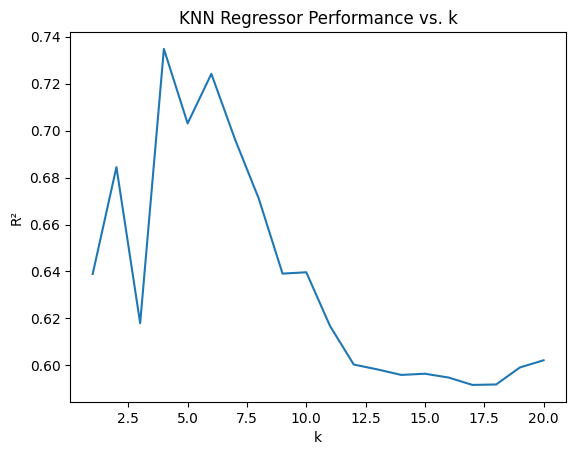

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt


df = pd.read_csv("Car Data P.csv")

# Quick inspection
print(df.head())
print(df.info())
print(df.isnull().sum().sum())  # Check missing values (should be 0)

# Define features and target
# Target: city_mpg (fuel efficiency in city)
# Features: Use raw numeric columns and encoded categoricals (avoid derived columns that depend on target)
feature_cols = [
    'cylinders', 'displacement', 'year',
    'make_encoded', 'class_encoded', 'drive_encoded', 'fuel_type_encoded',
    'transmission_encoded', 'size_category_encoded', 'drivetrain_type_encoded'
]  # Also consider adding other encoded columns if available

# Ensure all selected features exist
feature_cols = [col for col in feature_cols if col in df.columns]

X = df[feature_cols]
y = df['city_mpg']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for distance-based algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train KNN regressor
knn = KNeighborsRegressor(n_neighbors=5)  # default k=5, can be tuned
knn.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.3f}")

# Optional: try different k values
k_values = range(1, 21)
scores = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.plot(k_values, scores)
plt.xlabel('k')
plt.ylabel('R²')
plt.title('KNN Regressor Performance vs. k')
plt.show()